In [5]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Normal reading
#data = pd.read_csv('../outputs/small_extended/backups/full_week/emissions.csv', delimiter=',', engine='python')

#With chunk reading
chunksize = 10**6
tfr=pd.read_csv('../outputs/small_extended/emissions.csv', delimiter=',', engine='python', chunksize=chunksize, iterator=True)
data_simul = pd.concat(tfr, ignore_index=True)

In [7]:
#############
#Map small
#Torget - poly_79
#############
#Map small_extended
##
#with 200 x 200 cells
#Torget - poly_125
#Bakke kirke - poly_174
#Elgeseter - poly_120 (+-)
##
#with 100 x 100 cells
#Torget - poly_490
#Bakke kirke - poly_685
#Elgeseter - poly_504 (+-)
#############
#Map main
#Torget - poly_458
#Bakke kirke - poly_603
#Elgeseter - poly_488
#E6 Tiller - 

torvet_poly = 'poly_490'
bakke_kirke_poly = 'poly_685'
elgeseter_poly = 'poly_504'

date = '0202_0302'

simul_torget = data_simul[data_simul.Cell == torvet_poly]

simul_bakke_kirke = data_simul[data_simul.Cell == bakke_kirke_poly]

simul_elgeseter = data_simul[data_simul.Cell == elgeseter_poly]

#Resample with time_resolution average
time_resolution = 3600
simul_togert = simul_torget.groupby(by=(simul_torget['Timestep']/time_resolution).astype(int)).mean()
simul_bakke_kirke = simul_bakke_kirke.groupby(by=(simul_bakke_kirke['Timestep']/time_resolution).astype(int)).mean()
simul_elgeseter = simul_elgeseter.groupby(by=(simul_elgeseter['Timestep']/time_resolution).astype(int)).mean()

############
##Fetch real measurements
inputFile = open('real_pollution_data/torvet_'+ date +'_no2.json')
data = json.load(inputFile) 
real_torvet = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_torvet[i] = data[0]['values'][i]['value']
    
    
inputFile = open('real_pollution_data/bakke_kirke_'+ date +'_nox.json')
data = json.load(inputFile) 
real_bakke = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_bakke[i] = data[0]['values'][i]['value']    


inputFile = open('real_pollution_data/elgeseter_'+ date +'_nox.json')
data = json.load(inputFile) 
real_elgeseter = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_elgeseter[i] = data[0]['values'][i]['value']
    
    


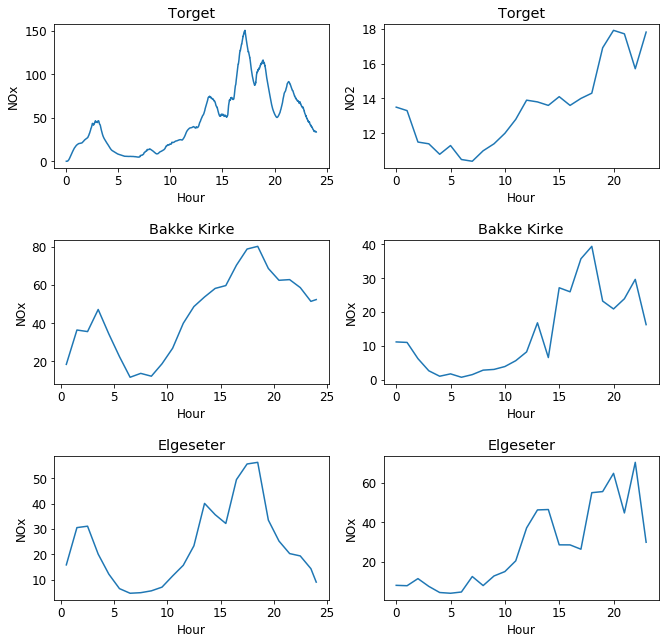

In [9]:
####Save single plot for simulated and real########
fig, axs = plt.subplots(3,2)

plt.rcParams.update({'font.size': 12})

axs[0,0].plot(simul_torget.Timestep/3600,simul_torget.NOx)
axs[0,0].set(xlabel='Hour', ylabel='NOx')
axs[0,0].set_title('Torget')
#axs[0,0].set_xlim(0,24)

axs[1,0].plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
axs[1,0].set(xlabel='Hour', ylabel='NOx')
axs[1,0].set_title('Bakke Kirke')
#axs[1,0].set_xlim(0,24)

axs[2,0].plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
axs[2,0].set(xlabel='Hour', ylabel='NOx')
axs[2,0].set_title('Elgeseter')
#axs[2,0].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

#plt.savefig('figs/simul_pollution.pdf',format='pdf',bbox_inches='tight')

#############################################
#Draw plots of real measurements

axs[0,1].plot(real_torvet)
#ax1.xticks(np.arange(len(no2)))
axs[0,1].set(xlabel='Hour', ylabel='NO2')
axs[0,1].set_title('Torget')
#axs[0,1].set_xlim(0,24)

######
 
axs[1,1].plot(real_bakke)
axs[1,1].set(xlabel='Hour', ylabel='NOx')
axs[1,1].set_title('Bakke Kirke')
#axs[1,1].set_xlim(0,24)

#####
   
axs[2,1].plot(real_elgeseter)
#ax3.xticks(np.arange(len(nox)))
axs[2,1].set(xlabel='Hour', ylabel='NOx')
axs[2,1].set_title('Elgeseter')
#axs[2,1].set_xlim(0,24)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

#fig.savefig('figs/real_pollution.pdf',format='pdf',bbox_inches='tight')
fig.savefig('figs/'+ date +'/compare_pollution.pdf',format='pdf',bbox_inches='tight')

#Subplots_adjust defaults
# left = 0.125  # the left side of the subplots of the figure
# right = 0.9   # the right side of the subplots of the figure
# bottom = 0.1  # the bottom of the subplots of the figure
# top = 0.9     # the top of the subplots of the figure
# wspace = 0.2  # the amount of width reserved for space between subplots,
#               # expressed as a fraction of the average axis width
# hspace = 0.2  # the amount of height reserved for space between subplots,
#               # expressed as a fraction of the average axis height

In [ ]:
## Save separate files for simulated and real########

#Draw plots of simulation
fig, axs = plt.subplots(3,1)

plt.rcParams.update({'font.size': 12})

axs[0].plot(simul_torget.Timestep/3600,simul_torget.NOx)
axs[0].set(xlabel='Hour', ylabel='NOx')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

axs[1].plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

axs[2].plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

plt.savefig('figs/simul_pollution.pdf',format='pdf',bbox_inches='tight')

#############################################
#Draw plots of real measurements

fig, axs = plt.subplots(3,1)

axs[0].plot(real_torvet)
#ax1.xticks(np.arange(len(no2)))
axs[0].set(xlabel='Hour', ylabel='NO2')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

######
 
axs[1].plot(real_bakke)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

#####
   
axs[2].plot(real_elgeseter)
#ax3.xticks(np.arange(len(nox)))
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

fig.savefig('figs/real_pollution.pdf',format='pdf',bbox_inches='tight')
#fig.savefig('figs/compare_pollution.pdf',format='pdf',bbox_inches='tight')

#Subplots_adjust defaults
# left = 0.125  # the left side of the subplots of the figure
# right = 0.9   # the right side of the subplots of the figure
# bottom = 0.1  # the bottom of the subplots of the figure
# top = 0.9     # the top of the subplots of the figure
# wspace = 0.2  # the amount of width reserved for space between subplots,
#               # expressed as a fraction of the average axis width
# hspace = 0.2  # the amount of height reserved for space between subplots,
#               # expressed as a fraction of the average axis height